<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/3_mxrcnn/Train%20with%20-%20Resnet-50%20Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/3_mxrcnn/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

# About the Network

1. Blog 1 on Resnet Network - https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

2. Blog 2 on Resnet Network - https://neurohive.io/en/popular-networks/resnet/

3. Blog 3 on Resnet Network - https://cv-tricks.com/keras/understand-implement-resnets/

4. Blog 4 on Redisual blocks - https://d2l.ai/chapter_convolutional-modern/resnet.html

5. Blog 1 on rcnn - https://medium.com/coinmonks/review-r-cnn-object-detection-b476aba290d1

6. Blog 2 on rcnn - https://towardsdatascience.com/r-cnn-3a9beddfd55a

7. Blog 1 on fast-rcnn - https://medium.com/coinmonks/review-fast-r-cnn-object-detection-a82e172e87ba

8. Blog 2 on fast-rcnn - https://towardsdatascience.com/part-2-fast-r-cnn-object-detection-7303e1988464

9. Blog 1 on faster rcnn - https://towardsdatascience.com/review-faster-r-cnn-object-detection-f5685cb30202

10. Blog 2 on faster rcnn - https://www.analyticsvidhya.com/blog/2018/11/implementation-faster-r-cnn-python-object-detection/

# COCO Format

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------ship (coco_dir) 
          |         |
          |         |---Images (img_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations (anno_dir)
          |         |----|
          |              |--------------------instances_Train.json 
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from train_base import *

In [3]:
# Dataset params

In [4]:
root_dir = "../sample_dataset/";
coco_dir = "ship";
img_dir = "Images"; 

In [5]:
set_dataset_params(root_dir=root_dir, 
                   coco_dir=coco_dir, imageset=img_dir);

In [6]:
# Model Type

In [7]:
set_model_params(model_name="resnet50");

In [8]:
# Hyper Params

In [9]:
set_hyper_params(gpus="0", lr=0.001, lr_decay_epoch="1", epochs=2, batch_size=1);

In [10]:
set_output_params(log_interval=100, save_prefix="model_resnet50");

In [11]:
# Preprocessing params

In [12]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [13]:
# Initialize params

In [14]:
initialize_rpn_params();

In [15]:
initialize_rcnn_params();

In [16]:
# Remove caches if any

In [17]:
if os.path.isdir("../sample_dataset/cache/"):
    os.system("rm -r ../sample_dataset/cache/")

In [18]:
# Invoke Dataloader

In [19]:
roidb = set_dataset();

INFO:root:computing cache ../sample_dataset/cache/coco_Images_roidb.pkl
INFO:root:saving cache ../sample_dataset/cache/coco_Images_roidb.pkl
INFO:root:coco_Images num_images 750
INFO:root:filter roidb: 750 -> 750
INFO:root:coco_Images append flipped images to roidb


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [20]:
#Network

In [21]:
sym = set_network();

In [22]:
# Train

In [23]:
train(sym, roidb);

INFO:root:max input shape
{'bbox_target': (1, 36, 63, 63),
 'bbox_weight': (1, 36, 63, 63),
 'data': (1, 3, 1000, 1000),
 'gt_boxes': (1, 100, 5),
 'im_info': (1, 3),
 'label': (1, 1, 567, 63)}
INFO:root:max output shape
{'bbox_loss_reshape_output': (1, 128, 24),
 'blockgrad0_output': (1, 128),
 'cls_prob_reshape_output': (1, 128, 6),
 'rpn_bbox_loss_output': (1, 36, 63, 63),
 'rpn_cls_prob_output': (1, 2, 567, 63)}
INFO:root:locking params
['bn_data_gamma',
 'bn_data_beta',
 'conv0_weight',
 'bn0_gamma',
 'bn0_beta',
 'stage1_unit1_bn1_gamma',
 'stage1_unit1_bn1_gamma',
 'stage1_unit1_bn1_beta',
 'stage1_unit1_bn1_beta',
 'stage1_unit1_conv1_weight',
 'stage1_unit1_bn2_gamma',
 'stage1_unit1_bn2_gamma',
 'stage1_unit1_bn2_beta',
 'stage1_unit1_bn2_beta',
 'stage1_unit1_conv2_weight',
 'stage1_unit1_bn3_gamma',
 'stage1_unit1_bn3_gamma',
 'stage1_unit1_bn3_beta',
 'stage1_unit1_bn3_beta',
 'stage1_unit1_conv3_weight',
 'stage1_unit1_sc_weight',
 'stage1_unit2_bn1_gamma',
 'stage1_unit2

INFO:root:Epoch[1] Batch [0-1000]	Speed: 2.88 samples/sec	RPNAcc=0.995352	RPNLogLoss=0.014952	RPNL1Loss=0.128794	RCNNAcc=0.977202	RCNNLogLoss=0.058628	RCNNL1Loss=0.487923
INFO:root:Epoch[1] Batch [0-1100]	Speed: 2.85 samples/sec	RPNAcc=0.995338	RPNLogLoss=0.014892	RPNL1Loss=0.125806	RCNNAcc=0.977535	RCNNLogLoss=0.058013	RCNNL1Loss=0.478038
INFO:root:Epoch[1] Batch [0-1200]	Speed: 2.82 samples/sec	RPNAcc=0.995329	RPNLogLoss=0.014854	RPNL1Loss=0.124250	RCNNAcc=0.977590	RCNNLogLoss=0.058088	RCNNL1Loss=0.470452
INFO:root:Epoch[1] Batch [0-1300]	Speed: 2.88 samples/sec	RPNAcc=0.995403	RPNLogLoss=0.014580	RPNL1Loss=0.122914	RCNNAcc=0.978058	RCNNLogLoss=0.056917	RCNNL1Loss=0.460216
INFO:root:Epoch[1] Batch [0-1400]	Speed: 2.81 samples/sec	RPNAcc=0.995391	RPNLogLoss=0.014567	RPNL1Loss=0.122112	RCNNAcc=0.978085	RCNNLogLoss=0.056834	RCNNL1Loss=0.456629
INFO:root:Epoch[1] Train-RPNAcc=0.995471
INFO:root:Epoch[1] Train-RPNLogLoss=0.014338
INFO:root:Epoch[1] Train-RPNL1Loss=0.121076
INFO:root:Epoch

# Running Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from infer_base import *

In [3]:
class_file = set_class_list("Monk_Object_Detection/example_notebooks/sample_dataset/ship/annotations/classes.txt");

In [4]:
#Model - Select the model as per number of iterations it has been trained for

In [5]:
set_model_params(model_name="resnet50", model_path="trained_model/model_resnet50-0002.params");

In [6]:
#Hyper Params

In [7]:
set_hyper_params(gpus="0", batch_size=1);

In [8]:
# Preprocessing

In [9]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [10]:
#Initalization

In [11]:
initialize_rpn_params();

In [12]:
initialize_rcnn_params();

In [13]:
#Network

In [14]:
sym = set_network();
mod = load_model(sym);

In [15]:
#Load Image and infer

type-3
 0.9998683929443359 [433.81265625, 431.5326953125, 696.886875, 671.045703125]
type-3
 0.9996277093887329 [867.66046875, 413.41578125, 1219.718125, 630.9809375]
type-3
 0.9991644620895386 [82.006435546875, 521.4776953125, 340.14296875, 617.5162109375]
['type-3\n', 0.9998683929443359, [433.81265625, 431.5326953125, 696.886875, 671.045703125]]


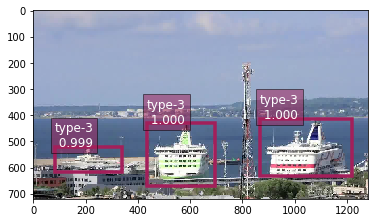

In [16]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/img1.jpg", mod);

type-3
 0.998994767665863 [99.5141796875, 511.32578125, 325.9235546875, 597.737890625]
['type-3\n', 0.998994767665863, [99.5141796875, 511.32578125, 325.9235546875, 597.737890625]]


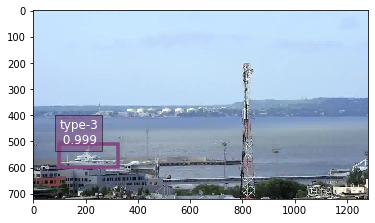

In [18]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/img4.jpg", mod);

type-3
 0.999474823474884 [94.10109375, 510.1259375, 331.808203125, 600.324296875]
['type-3\n', 0.999474823474884, [94.10109375, 510.1259375, 331.808203125, 600.324296875]]


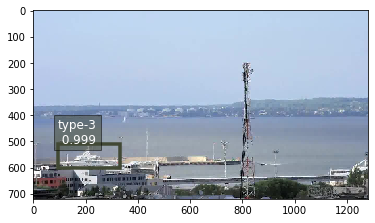

In [19]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/img5.jpg", mod);

type-3
 0.9996758699417114 [883.2784375, 418.7742578125, 1224.603125, 638.3715234375]
type-3
 0.9936409592628479 [186.471796875, 414.8326953125, 579.877578125, 564.3256640625]
type-3
 0.9782811403274536 [85.62564453125, 514.304765625, 361.658828125, 607.939375]
['type-3\n', 0.9996758699417114, [883.2784375, 418.7742578125, 1224.603125, 638.3715234375]]


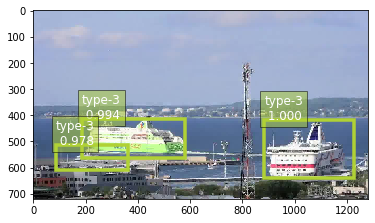

In [20]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/img6.jpg", mod);